In [94]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
import matplotlib.pyplot as plt

In [95]:
df=pd.read_csv('C:/Users/Kaiyu/Downloads/BTC-INR (1).csv',parse_dates=True)
df = pd.DataFrame(df)

df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [96]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [97]:
df

Date          Open          High           Low         Close  \
0     9/17/2014  2.844333e+04  2.854223e+04  2.755250e+04  2.785164e+04   
1     9/18/2014  2.782277e+04  2.782277e+04  2.508574e+04  2.577412e+04   
2     9/19/2014  2.575365e+04  2.598884e+04  2.336609e+04  2.402334e+04   
3     9/20/2014  2.401585e+04  2.575756e+04  2.372438e+04  2.488181e+04   
4     9/21/2014  2.483197e+04  2.509612e+04  2.392506e+04  2.426826e+04   
...         ...           ...           ...           ...           ...   
3452  2/29/2024  4.733730e+06  5.297728e+06  4.703020e+06  5.182407e+06   
3453   3/1/2024  5.181942e+06  5.272938e+06  5.015262e+06  5.074218e+06   
3454   3/2/2024  5.071704e+06  5.231394e+06  5.038201e+06  5.172978e+06   
3455   3/3/2024  5.172234e+06  5.174475e+06  5.108082e+06  5.138946e+06   
3456   3/4/2024  5.230679e+06  5.315710e+06  5.168504e+06  5.262080e+06   

         Adj Close        Volume  
0     2.785164e+04  1.282359e+09  
1     2.577412e+04  2.093992e+09  
2     2.402334e+04  2.307414e+09  
3     2.488181e+04  2.243150e+09  
4     2.426826e+04  1.617399e+09  
...            ...           ...  
3452  5.182407e+06  6.901540e+12  
3453  5.074218e+06  5.430600e+12  
3454  5.172978e+06  3.329290e+12  
3455  5.138946e+06  1.979070e+12  
3456  5.262080e+06  2.897430e+12  

[3457 rows x 7 columns]

In [98]:
df=df[["Date","High"]]
df.head()

Date         High
0  9/17/2014  28542.22852
1  9/18/2014  27822.77344
2  9/19/2014  25988.83594
3  9/20/2014  25757.56055
4  9/21/2014  25096.12109

In [99]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

C:\Users\Kaiyu\AppData\Local\Temp\ipykernel_8356\3248147807.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ds          y
3452 2024-02-29  5297727.5
3453 2024-03-01  5272938.0
3454 2024-03-02  5231394.0
3455 2024-03-03  5174475.0
3456 2024-03-04  5315710.0

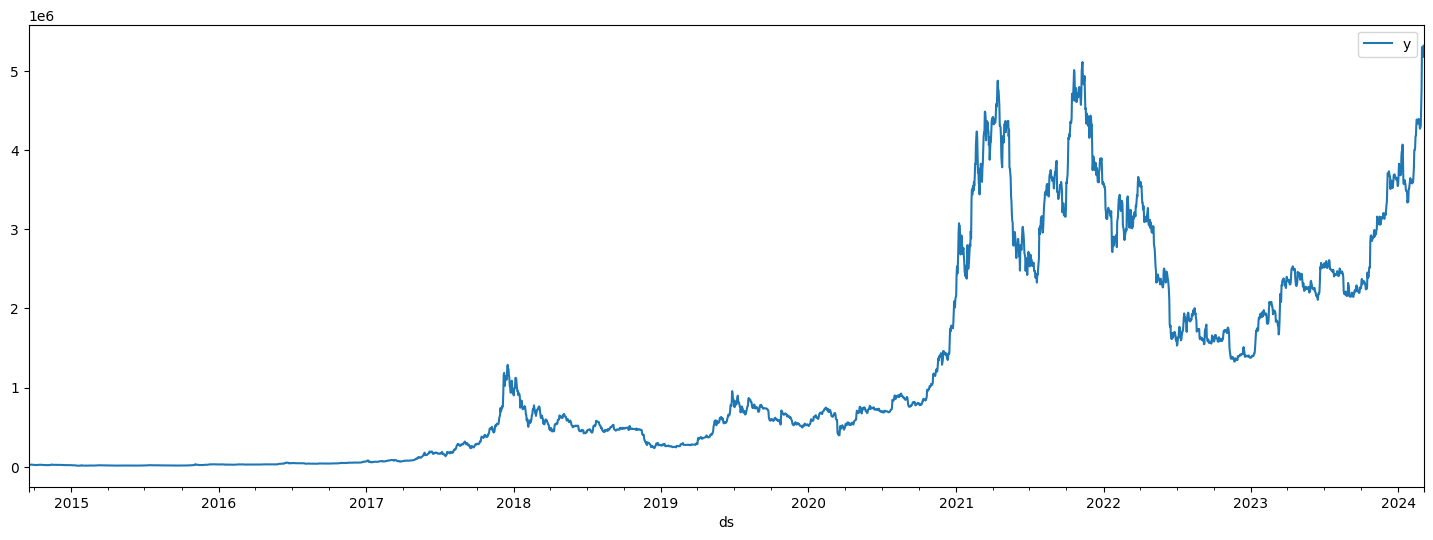

In [100]:
df.plot(x='ds',y='y',figsize=(18,6))
plt.show()

In [101]:
df = df[(df['ds'] >= '2022-06-01')&(df['ds'] <= '2024-01-01')]
# df = df[(df['ds'].dt.year >= 2022) & (df['ds'].dt.year <= df['ds'].dt.year.max())]

In [102]:
df

ds           y
2814 2022-06-01  2488198.25
2815 2022-06-02  2368191.25
2816 2022-06-03  2373037.00
2817 2022-06-04  2325407.25
2818 2022-06-05  2339950.00
...         ...         ...
3389 2023-12-28  3637709.00
3390 2023-12-29  3647354.50
3391 2023-12-30  3588778.50
3392 2023-12-31  3543806.00
3393 2024-01-01  3566842.25

[580 rows x 2 columns]

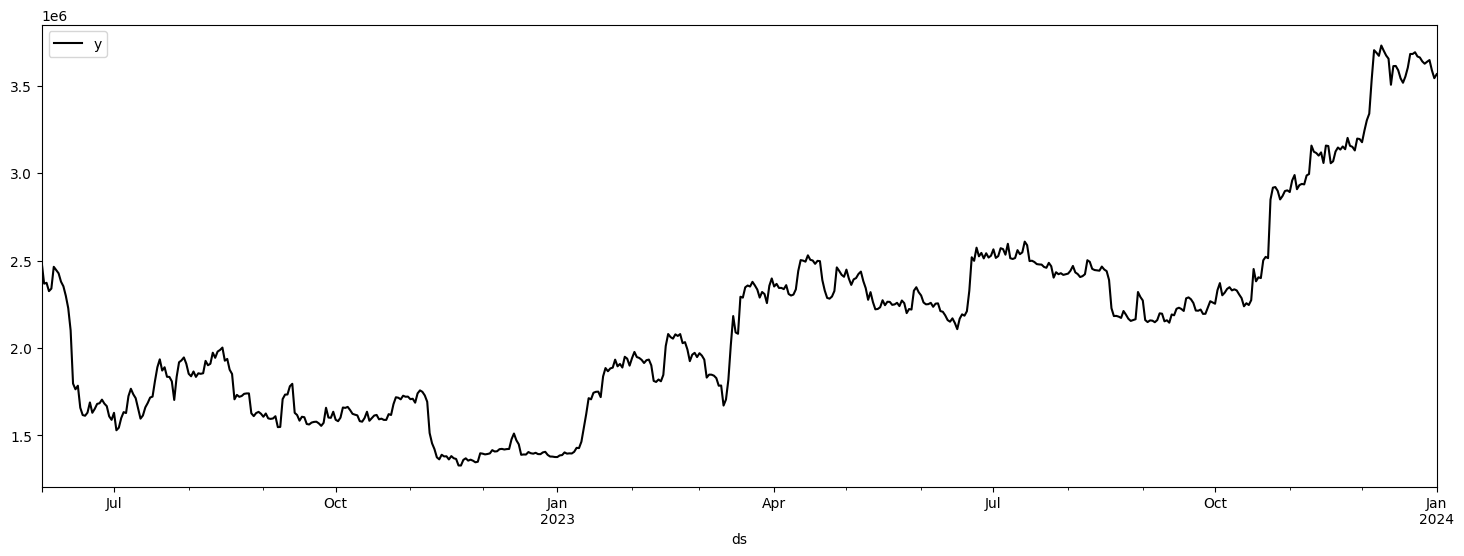

In [103]:
df.plot(x='ds',y='y',figsize=(18,6),color='black')
plt.show()

In [104]:
df

ds           y
2814 2022-06-01  2488198.25
2815 2022-06-02  2368191.25
2816 2022-06-03  2373037.00
2817 2022-06-04  2325407.25
2818 2022-06-05  2339950.00
...         ...         ...
3389 2023-12-28  3637709.00
3390 2023-12-29  3647354.50
3391 2023-12-30  3588778.50
3392 2023-12-31  3543806.00
3393 2024-01-01  3566842.25

[580 rows x 2 columns]

In [105]:
len(df)

580

In [106]:
train = df.iloc[:len(df)-220]
test = df.iloc[len(df)-220:]

In [107]:
train

ds           y
2814 2022-06-01  2488198.25
2815 2022-06-02  2368191.25
2816 2022-06-03  2373037.00
2817 2022-06-04  2325407.25
2818 2022-06-05  2339950.00
...         ...         ...
3169 2023-05-22  2258703.25
3170 2023-05-23  2239903.50
3171 2023-05-24  2271797.75
3172 2023-05-25  2256673.00
3173 2023-05-26  2199688.75

[360 rows x 2 columns]

In [108]:
test

ds           y
3174 2023-05-27  2223015.50
3175 2023-05-28  2220075.25
3176 2023-05-29  2328011.00
3177 2023-05-30  2347777.00
3178 2023-05-31  2319063.50
...         ...         ...
3389 2023-12-28  3637709.00
3390 2023-12-29  3647354.50
3391 2023-12-30  3588778.50
3392 2023-12-31  3543806.00
3393 2024-01-01  3566842.25

[220 rows x 2 columns]

In [124]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=734) #MS for monthly, H for hourly
forecast = m.predict(future)

10:56:27 - cmdstanpy - INFO - Chain [1] start processing
10:56:27 - cmdstanpy - INFO - Chain [1] done processing


In [125]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
1089 2025-05-25  6.679110e+06  3.869869e+06  9.348913e+06
1090 2025-05-26  6.690771e+06  3.930777e+06  9.382124e+06
1091 2025-05-27  6.694837e+06  3.898459e+06  9.338008e+06
1092 2025-05-28  6.711370e+06  3.923254e+06  9.380394e+06
1093 2025-05-29  6.718557e+06  3.880565e+06  9.468915e+06

In [126]:
forecast['yhat']=(forecast['yhat']+forecast['yhat_upper'] )/ 2

In [127]:
plot_plotly(m ,forecast)

In [128]:
plot_components_plotly(m, forecast)

In [85]:
from statsmodels.tools.eval_measures import rmse

In [86]:
predictions = forecast.iloc[-220:]['yhat']

In [87]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  4612170.878743473
Mean Value of Test Dataset: 2641812.246590909


In [88]:
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2022-06-01  1.983137e+06  1.788636e+06  2.218135e+06  1.983137e+06   
1    2022-06-02  1.979650e+06  1.775128e+06  2.184617e+06  1.979650e+06   
2    2022-06-03  1.976162e+06  1.777437e+06  2.179933e+06  1.976162e+06   
3    2022-06-04  1.972675e+06  1.753688e+06  2.169506e+06  1.972675e+06   
4    2022-06-05  1.969188e+06  1.760198e+06  2.170115e+06  1.969188e+06   
...         ...           ...           ...           ...           ...   
1089 2025-05-25  6.687200e+06  4.034552e+06  9.599168e+06  4.034198e+06   
1090 2025-05-26  6.692928e+06  4.058470e+06  9.559621e+06  4.038156e+06   
1091 2025-05-27  6.698657e+06  3.990025e+06  9.677632e+06  4.039263e+06   
1092 2025-05-28  6.704385e+06  4.018576e+06  9.727186e+06  4.038296e+06   
1093 2025-05-29  6.710114e+06  4.077251e+06  9.700418e+06  4.037329e+06   

       trend_upper  additive_terms  additive_terms_lower  \
0     1.983137e+06     6985.140010           6985.140010   
1     1.979650e+06     8443.686539           8443.686539   
2     1.976162e+06     5112.727433           5112.727433   
3     1.972675e+06    -6475.660486          -6475.660486   
4     1.969188e+06    -8089.492226          -8089.492226   
...            ...             ...                   ...   
1089  9.663481e+06    -8089.492226          -8089.492226   
1090  9.674820e+06    -2156.711619          -2156.711619   
1091  9.686078e+06    -3819.689650          -3819.689650   
1092  9.697336e+06     6985.140010           6985.140010   
1093  9.708594e+06     8443.686539           8443.686539   

      additive_terms_upper       weekly  weekly_lower  weekly_upper  \
0              6985.140010  6985.140010   6985.140010   6985.140010   
1              8443.686539  8443.686539   8443.686539   8443.686539   
2              5112.727433  5112.727433   5112.727433   5112.727433   
3             -6475.660486 -6475.660486  -6475.660486  -6475.660486   
4             -8089.492226 -8089.492226  -8089.492226  -8089.492226   
...                    ...          ...           ...           ...   
1089          -8089.492226 -8089.492226  -8089.492226  -8089.492226   
1090          -2156.711619 -2156.711619  -2156.711619  -2156.711619   
1091          -3819.689650 -3819.689650  -3819.689650  -3819.689650   
1092           6985.140010  6985.140010   6985.140010   6985.140010   
1093           8443.686539  8443.686539   8443.686539   8443.686539   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
1089                   0.0                         0.0   
1090                   0.0                         0.0   
1091                   0.0                         0.0   
1092                   0.0                         0.0   
1093                   0.0                         0.0   

      multiplicative_terms_upper          yhat  
0                            0.0  2.104128e+06  
1                            0.0  2.086355e+06  
2                            0.0  2.080604e+06  
3                            0.0  2.067853e+06  
4                            0.0  2.065607e+06  
...                          ...           ...  
1089                         0.0  8.139139e+06  
1090                         0.0  8.125196e+06  
1091                         0.0  8.186234e+06  
1092                         0.0  8.219278e+06  
1093                         0.0  8.209488e+06  

[1094 rows x 16 columns]

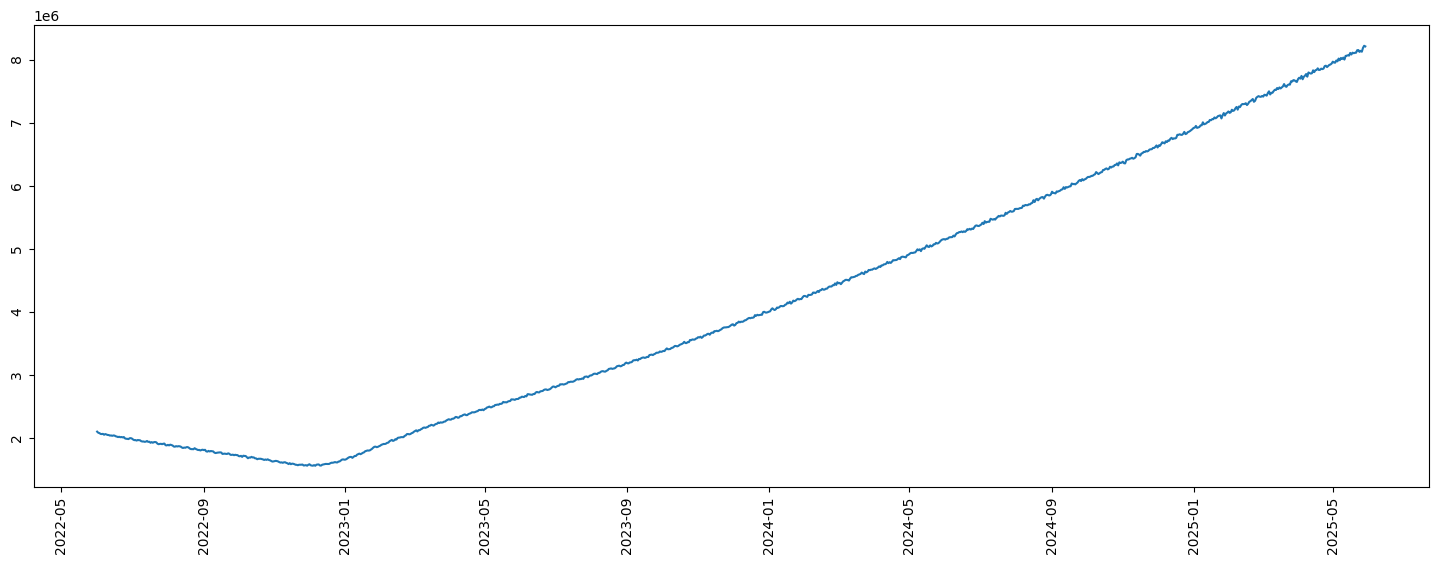

In [89]:
# forecast.plot(x='ds',y='yhat',figsize=(18,6))
# plt.xticks(forecast['ds'],rotation=90)
# plt.show()

forecast['ds'] = pd.to_datetime(forecast['ds'])

forecast = forecast.dropna(subset=['yhat'])

plt.figure(figsize=(18, 6))
plt.plot(forecast['ds'], forecast['yhat'])
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

In [90]:
forecast = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'].dt.year <= forecast['ds'].dt.year.max())]
forecast=forecast[['ds','yhat']]


In [91]:
forecast

ds          yhat
579  2024-01-01  4.004751e+06
580  2024-01-02  4.010403e+06
581  2024-01-03  4.041379e+06
582  2024-01-04  4.058741e+06
583  2024-01-05  4.040965e+06
...         ...           ...
1089 2025-05-25  8.139139e+06
1090 2025-05-26  8.125196e+06
1091 2025-05-27  8.186234e+06
1092 2025-05-28  8.219278e+06
1093 2025-05-29  8.209488e+06

[515 rows x 2 columns]

In [92]:
forecast.columns = ['Date','BTC']
forecast.reset_index(drop=True, inplace=True)

In [93]:
forecast.to_csv('forecast.csv',index=False)